# 1283. Find the Smallest Divisor Given a Threshold

### Difficulty: <font color = orange> Medium </font>

---

Given an array of integers `nums` and an integer `threshold`, we will choose a positive integer `divisor`, divide all the array by it, and sum the division's result. Find the smallest `divisor` such that the result mentioned above is less than or equal to `threshold`.

Each result of the division is rounded to the nearest integer greater than or equal to that element. (For example: `7/3 = 3` and `10/2 = 5`).

The test cases are generated so that there will be an answer.
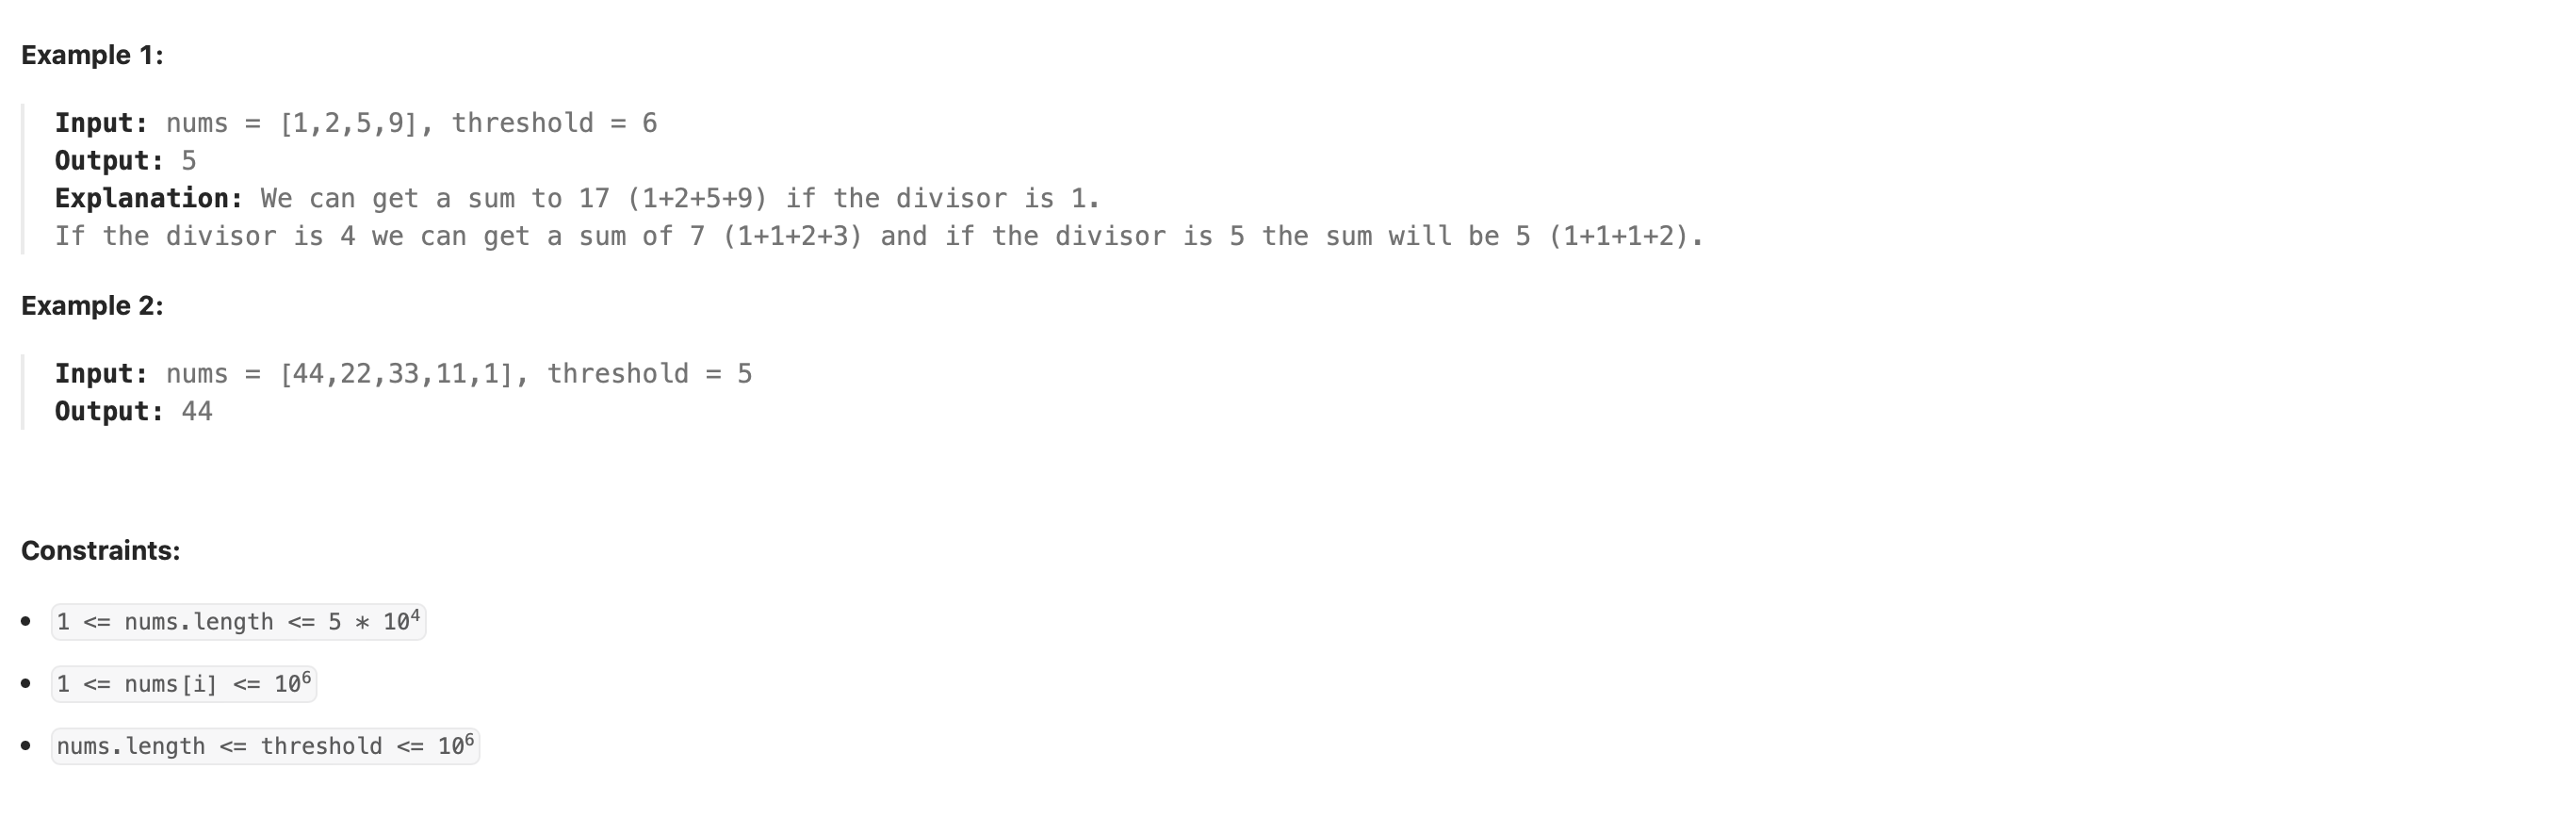

## Approach Overview:

Fairly straight forward problem given my previous encounters of similar problem.

We define the range of possible values the `divisor` can fall in , and using binary search we find the smallest within the range that satisfies the following condition `result <= threshold`, where `result = sum(nums / divisor)`

## Detailed Explanation:

Again fairly straightforward, we define the range of values a valid divisor can take.

minimum possible value is $1$ (lower bound)

maximum possible value is $10^6$ (upper bound)

$1 <= divisor <= 10^6$ 

We search through that range using binary search to find the smallest valid `divisor` possible. 

Calculating the result and checking if it's valid (i.e. if its less than or equal to `threshold` is fairly easy). 

We iterate through every integer in `nums` and we divide the current element by the trial `divisor` value and then sum the division's result. Finally, we then check if the final result is `<= threshold`.

*NOTE: Each result of the division is rounded to the nearest integer greater than or equal to that element. (For example: `7/3 = 3` and `10/2 = 5`)*.

If the `divisor` value is valid we narrow search search range to find an even smaller one until we discover the smallest possible valid one.

If the `divisor` value is not valid (the final calculation result `> threshold`), we narrow search range to find larger `divisor` (because current one and all smaller values are invalid).


## Key Challenges:

No challenges. I managed to solve it on my own. Although devising the correct condition did come we some effort and thinking.


## Solution:

In [ ]:
class Solution:
    def smallestDivisor(self, nums: List[int], threshold: int) -> int:
        def isDivisorValid(divisor):
            # helper function to check if current divisor is valid 
            
            # variable to store result
            result = 0
            
            # loop through every integer element in `nums`` 
            for num in nums:
                # calculate and increment result
                result += ceil(num / divisor)
            
            # check if divisor is valid (i.e if result <= threshold)
            # return True if valid, otherwise False     
            return result <= threshold
    
        # initialize lower bound
        left = 1
        # initialize upper bound
        right = 10**6
        
        # loop until left and right pointer
        while left < right:

            # calculate the middle value in current search range
            mid = left + (right - left) // 2

            # check if result of mid (current divisor) is valid
            if isDivisorValid(mid) == True:

                # narrow search range to find a smaller valid divisor
                right = mid
            
            # divisor is not valid (i.e. its too small)
            else:
                # narrow search range to find a larger valid one
                left = mid + 1
        
        # return the smallest valid divisor
        return left                  